## Income Group Classification

## Context 
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government. 

### Objective

1. What are the different factors that influence the income of an individual?

2. To build a prediction model that can help the government formulate policies for the right pockets of the society.

### Dataset

The data contains characteristics of the people

* age: continuous - age of a Person 
* workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

### Loading Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data cleaning steps and observations from EDA.

### Load data

In [2]:
who = pd.read_csv("who_data.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,White,Female,15024,0,40,United-States,>50K


### Understand the shape of the dataset.

In [6]:
data.shape

(32561, 14)

* The dataset has 32561 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   race                    32561 non-null  object
 8   sex                     32561 non-null  object
 9   capital gain            32561 non-null  int64 
 10  capital loss            32561 non-null  int64 
 11  working hours per week  32561 non-null  int64 
 12  native-country          32561 non-null  object
 13  salary                  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


* We see that names of the columns have spaces, dots, and dash which we will remove as they should not be present in column names. We are doing this to maintain uniformity along with column names
* Dependent variable is the salary which is of categorical type
* age, capital gain, and capital loss are of integer type while other variables are of categorical type
* There are no missing values in the dataset.

In [8]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns =[col.replace(' ','_') for col in data.columns]
data.columns =[col.replace('-','_') for col in data.columns]
data.columns =[col.replace('.','') for col in data.columns]

In [9]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'native_country', 'salary'],
      dtype='object')


* column names are fixed

### Summary of the dataset.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

**Lets us look at different levels in categorical variables**

In [11]:
# filtering object type columns
cat_columns = data.describe(include=['object']).columns
cat_columns

Index(['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex',
       'native_country', 'salary'],
      dtype='object')

In [12]:
for i in cat_columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in workclass are :
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
**************************************************
Unique values in education are :
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
**************************************************
Unique values in marital_status are :
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 

* There are some values represented by a '?' in workclass, occupation, and native country columns which we should investigate further.
* There are many distinct values in native_country that can be reduced to their respective continents.
* The distinct levels of marital_status can also be reduced.

#### We can assume that wherever there is a ? the data is unknown or missing. Let us see if there is a pattern in the missingness.

#### workclass

In [13]:
data[data['workclass'] ==' ?'].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
22101,21,?,262280,Some-college,10,Married-civ-spouse,?,White,Female,3781,0,40,United-States,<=50K
8085,67,?,81761,HS-grad,9,Divorced,?,White,Male,0,0,20,United-States,<=50K
10253,17,?,210547,10th,6,Never-married,?,White,Male,0,0,40,United-States,<=50K
7763,53,?,64322,7th-8th,4,Separated,?,White,Male,0,0,40,United-States,<=50K
27085,18,?,78567,Some-college,10,Never-married,?,White,Male,0,0,30,United-States,<=50K


* From the sample it looks like wherever workclass is missing occupation is also missing. 
* It looks like for ? observations in workclass the native country is the United States.
* Let's see if the above observations hold.

In [14]:
data[data['workclass'] ==' ?']['occupation'].value_counts()

 ?    1836
Name: occupation, dtype: int64

* It is indeed true that wherever workclass has ? the occupation is also ?
* This indicates there is a strong pattern in the missingness of workclass and occupation. This is intuitive as well because both the columns are capturing similar information.

In [15]:
data[data['workclass'] ==' ?']['native_country'].value_counts()

 United-States         1659
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 Taiwan                   9
 Germany                  9
 South                    9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Dominican-Republic       3
 Vietnam                  3
 Columbia                 3
 Japan                    3
 Cuba                     3
 Portugal                 3
 Haiti                    2
 France                   2
 Scotland                 1
 Thailand                 1
 Cambodia                 1
 Guatemala                1
 Jamaica                  1
 Iran                     1
 Honduras                 1
 Nicaragua                1
 Peru                     1
 Ecuador                  1
 Trinadad&Tobago          1
 Hong                     1
 Laos                     1
Name: native_country

* The above observations don't hold for native_country as there many other countries where the observations are ?.

#### occupation

In [16]:
data[data['occupation'] ==' ?'].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
30208,17,?,34019,10th,6,Never-married,?,White,Male,0,0,20,United-States,<=50K
27563,28,?,131310,HS-grad,9,Separated,?,White,Female,0,0,40,United-States,<=50K
25056,18,?,67793,HS-grad,9,Never-married,?,White,Female,0,0,60,United-States,<=50K
5928,21,?,134746,Some-college,10,Never-married,?,White,Female,0,0,35,United-States,<=50K
30827,57,?,50248,Some-college,10,Married-civ-spouse,?,White,Male,0,0,40,United-States,<=50K


In [17]:
data[data['occupation'] ==' ?']['workclass'].value_counts()

 ?               1836
 Never-worked       7
Name: workclass, dtype: int64

* We observe the same pattern here, where occupation is ? most of the values in workclass are ?.

In [18]:
data[data['occupation'] ==' ?']['native_country'].value_counts()

 United-States         1666
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 Taiwan                   9
 Germany                  9
 South                    9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Dominican-Republic       3
 Vietnam                  3
 Columbia                 3
 Japan                    3
 Cuba                     3
 Portugal                 3
 Haiti                    2
 France                   2
 Scotland                 1
 Thailand                 1
 Cambodia                 1
 Guatemala                1
 Jamaica                  1
 Iran                     1
 Honduras                 1
 Nicaragua                1
 Peru                     1
 Ecuador                  1
 Trinadad&Tobago          1
 Hong                     1
 Laos                     1
Name: native_country

* The native_country column has other countries where the observations are ? corresponding to ?s in occupation.

#### native_country

In [19]:
data[data['native_country'] ==' ?'].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
6242,27,Private,195681,Some-college,10,Never-married,Prof-specialty,White,Female,0,0,48,?,<=50K
453,42,Private,197583,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Black,Male,0,0,40,?,>50K
12362,29,State-gov,106334,Masters,14,Never-married,Exec-managerial,White,Male,0,0,40,?,<=50K
887,33,Self-emp-inc,155781,Some-college,10,Married-civ-spouse,Craft-repair,White,Male,0,0,60,?,<=50K
6186,43,Private,163215,Bachelors,13,Married-civ-spouse,Other-service,White,Female,0,0,35,?,>50K


In [20]:
data[data['native_country'] ==' ?']['occupation'].value_counts()

 Prof-specialty       102
 Other-service         83
 Exec-managerial       74
 Craft-repair          69
 Sales                 66
 Adm-clerical          49
 Machine-op-inspct     36
 ?                     27
 Transport-moving      25
 Handlers-cleaners     20
 Tech-support          16
 Priv-house-serv        6
 Protective-serv        5
 Farming-fishing        5
Name: occupation, dtype: int64

In [21]:
data[data['native_country'] ==' ?']['workclass'].value_counts()

 Private             410
 Self-emp-not-inc     42
 Self-emp-inc         42
 ?                    27
 Local-gov            26
 State-gov            19
 Federal-gov          17
Name: workclass, dtype: int64

* There is no clear pattern here.

#### Observations:
* We observe that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replace these ?'s with the 'unknown' category.

#### Replacing ? with 'Unknown'

In [22]:
data.workclass = data.workclass.apply(lambda x: 'Unknown' if x == ' ?' else x)
data.native_country = data.native_country.apply(lambda x: 'Unknown' if x == ' ?' else x)
data.occupation = data.occupation.apply(lambda x: 'Unknown' if x == ' ?' else x)

#### Mapping countries to continents to reduce the number of unique values.

In [23]:
data.native_country.nunique()

42

* There are 42 distinct countries in the data set, we can reduce them to their respective continents as this will help us reduce the dimension of data.

In [24]:
data.native_country = data.native_country.str.replace(' ','') # remove empty spaces from strings

In [25]:
north_america  = ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala",
                   "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua",
                   "Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago",
                   "United-States"]
asia  = ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
          "Philippines", "Taiwan", "Thailand", "Vietnam"]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = ["England", "France", "Germany", "Greece", "Holand-Netherlands",
            "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
            "Yugoslavia"]
other  = ["South", "Unknown","?"]

In [26]:
def region_combining(x):
    if x in north_america:
        return 'north_america'
    elif x in asia:
        return 'asia'
    elif x in south_america:
        return 'south_america'
    elif x in europe:
        return 'europe'
    elif x in other:
        return 'other'
    else:
        return x

In [27]:
data['native_country'] = data['native_country'].apply(region_combining)

In [28]:
print('Distinct values in Native Country column:', data.native_country.nunique())

Distinct values in Native Country column: 5


#### Reducing the number of distinct values in marital_status

In [29]:
data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

We can reduce these values into the following groups:
* Married
* Not-Married
* Never-Married

In [30]:
data.marital_status = data.marital_status.str.replace(' ','') # remove empty spaces from strings

married = ['Married-civ-spouse','Married-AF-spouse']
not_married = ['Divorced','Separated','Widowed','Married-spouse-absent']

def reduce_marital_status(x):
    if x in married:
        return 'married'
    elif x in not_married:
        return 'not_married'
    else:
        return x

In [31]:
data.marital_status = data.marital_status.apply(reduce_marital_status)

In [32]:
data.marital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

* Values have been clubbed into three categories.

## Univariate Analysis

In [33]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on fnlwgt

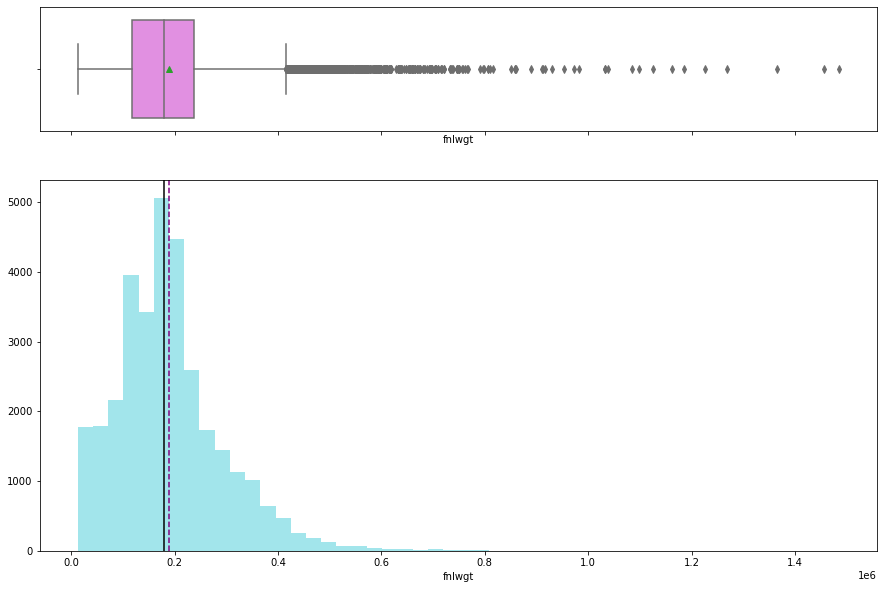

In [34]:
histogram_boxplot(data.fnlwgt)

* fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.

### Observations on hours_per_week

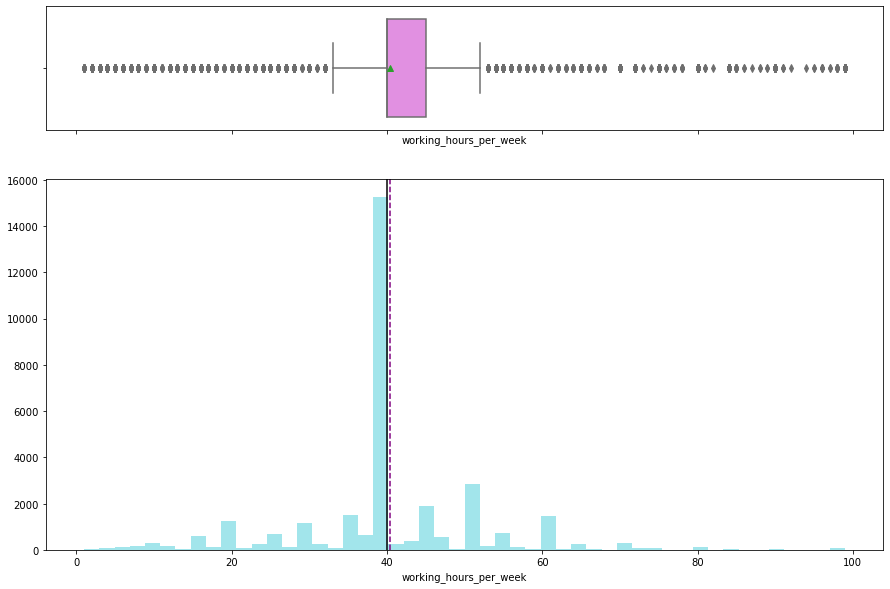

In [35]:
histogram_boxplot(data.working_hours_per_week)

* Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week.
* Some of the observations are clear outliers like working  1 hour a week which needs to be treated.

In [36]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on workclass

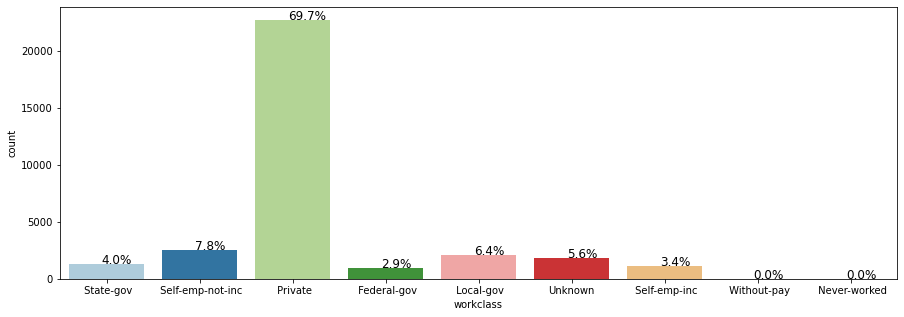

In [37]:
perc_on_bar('workclass')

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

### Observations on marital_status

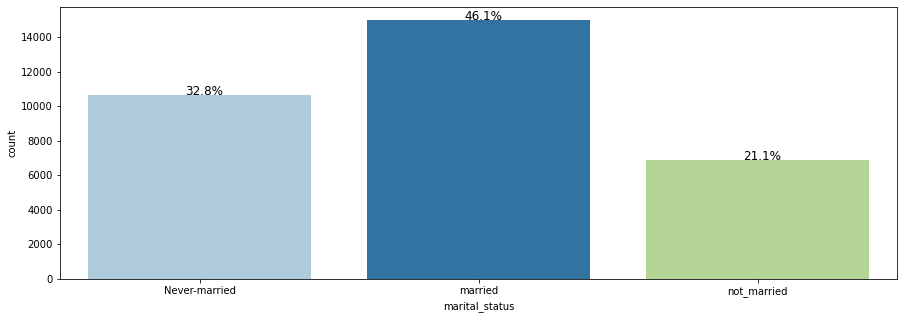

In [38]:
perc_on_bar('marital_status')

* 47.3% of the observations in the dataset are married followed by 32.8% of the people who never married.

### Observations on native_country

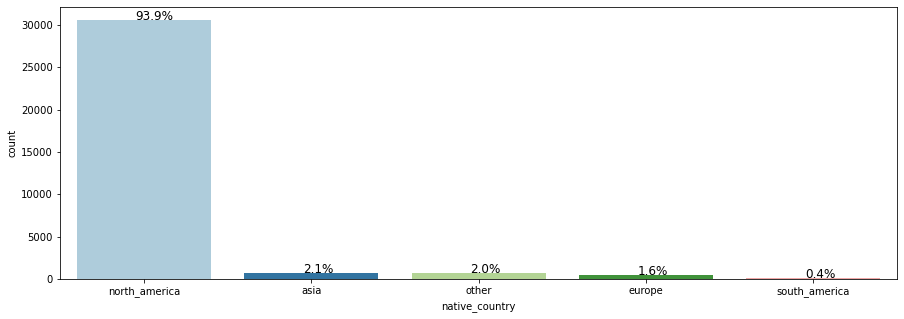

In [39]:
perc_on_bar('native_country')

* 94% of the people are native to north_america followed by 2.1% Asians.

### Observations on salary

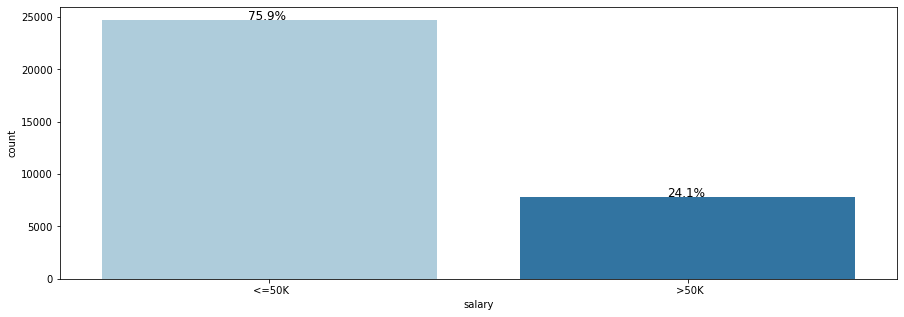

In [40]:
perc_on_bar('salary')

* 24% of the observations have a salary above 50K and while 76% have a salary below 50K

## Bivariate analysis

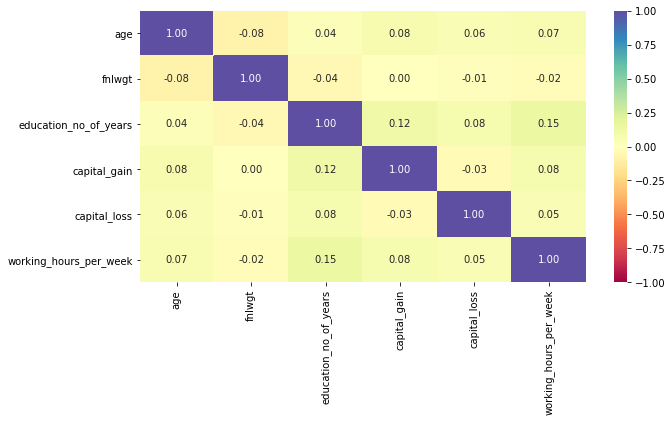

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* There is no significant correlation between the columns.

In [42]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['salary'],margins=True).sort_values(by=' >50K',ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['salary'],normalize='index').sort_values(by=' >50K',ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

salary    <=50K   >50K    All
sex                          
All       24720   7841  32561
 Male     15128   6662  21790
 Female    9592   1179  10771
------------------------------------------------------------------------------------------------------------------------


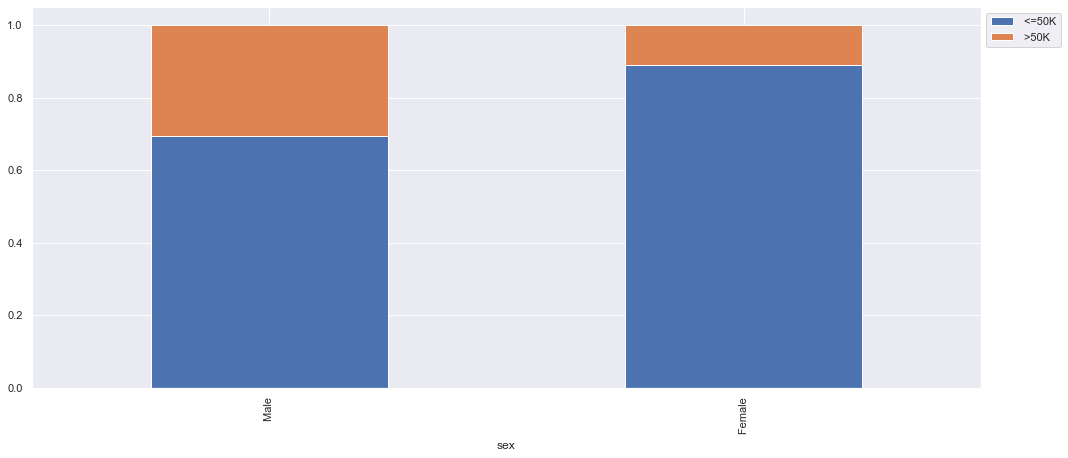

In [43]:
stacked_plot(data['sex'])

* ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

### salary vs education

salary          <=50K   >50K    All
education                          
All             24720   7841  32561
 Bachelors       3134   2221   5355
 HS-grad         8826   1675  10501
 Some-college    5904   1387   7291
 Masters          764    959   1723
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          606     40    646
 12th             400     33    433
 9th              487     27    514
 5th-6th          317     16    333
 1st-4th          162      6    168
 Preschool         51      0     51
------------------------------------------------------------------------------------------------------------------------


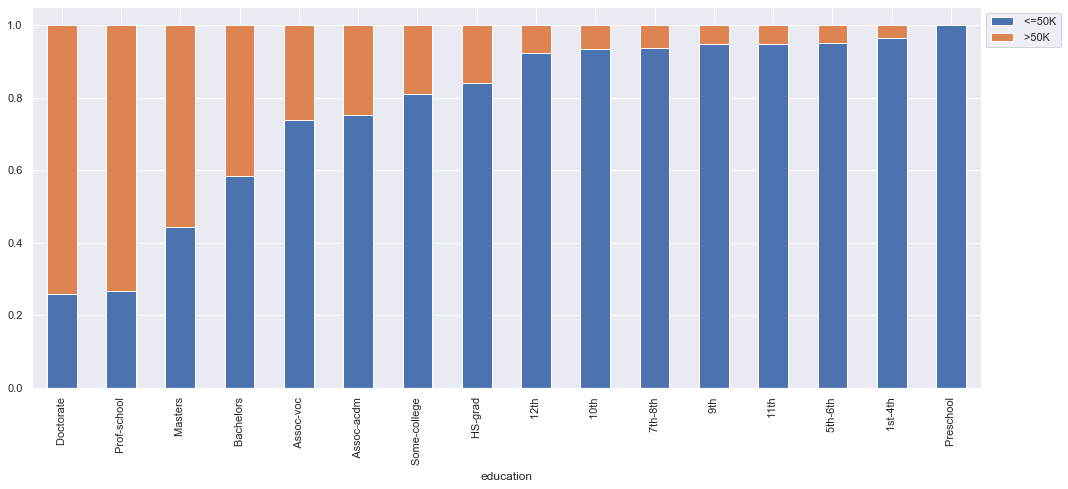

In [44]:
stacked_plot(data['education'])

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

### salary vs occupation

salary               <=50K   >50K    All
occupation                              
All                  24720   7841  32561
 Exec-managerial      2098   1968   4066
 Prof-specialty       2281   1859   4140
 Sales                2667    983   3650
 Craft-repair         3170    929   4099
 Adm-clerical         3263    507   3770
 Transport-moving     1277    320   1597
 Tech-support          645    283    928
 Machine-op-inspct    1752    250   2002
 Protective-serv       438    211    649
Unknown               1652    191   1843
 Other-service        3158    137   3295
 Farming-fishing       879    115    994
 Handlers-cleaners    1284     86   1370
 Armed-Forces            8      1      9
 Priv-house-serv       148      1    149
------------------------------------------------------------------------------------------------------------------------


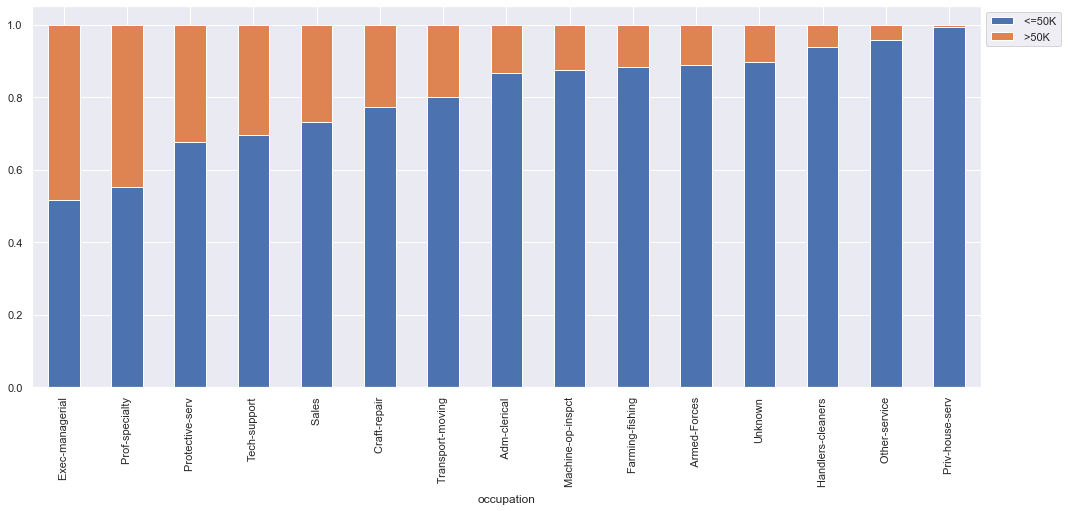

In [45]:
stacked_plot(data['occupation'])

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

### salary vs race

salary                <=50K   >50K    All
race                                     
All                   24720   7841  32561
 White                20699   7117  27816
 Black                 2737    387   3124
 Asian-Pac-Islander     763    276   1039
 Amer-Indian-Eskimo     275     36    311
 Other                  246     25    271
------------------------------------------------------------------------------------------------------------------------


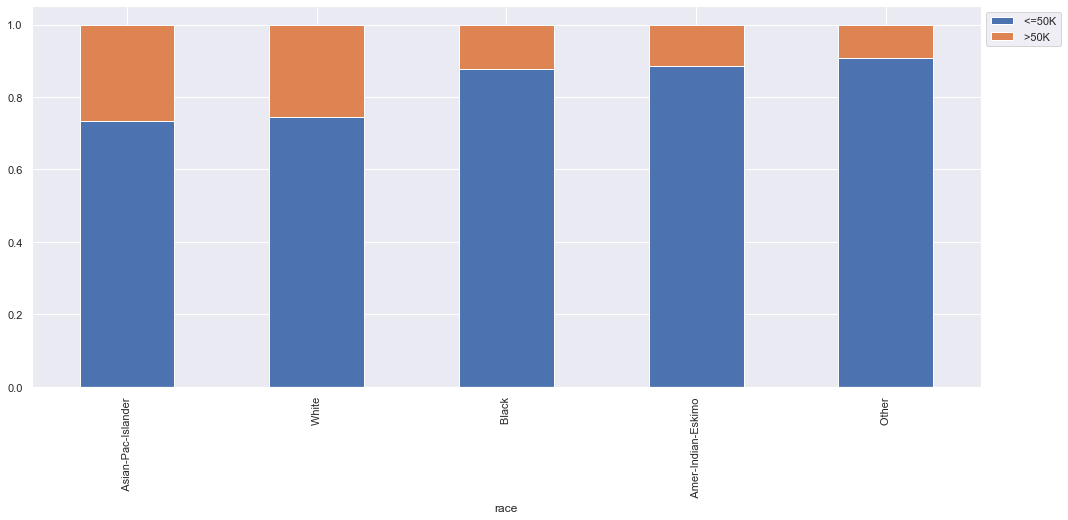

In [46]:
stacked_plot(data['race'])

* 25% of the White and Asia-Pacific people have a salary more than 50K salary as compared to people from other race.

### salary vs workclass

salary              <=50K   >50K    All
workclass                              
All                 24720   7841  32561
 Private            17733   4963  22696
 Self-emp-not-inc    1817    724   2541
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
Unknown              1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


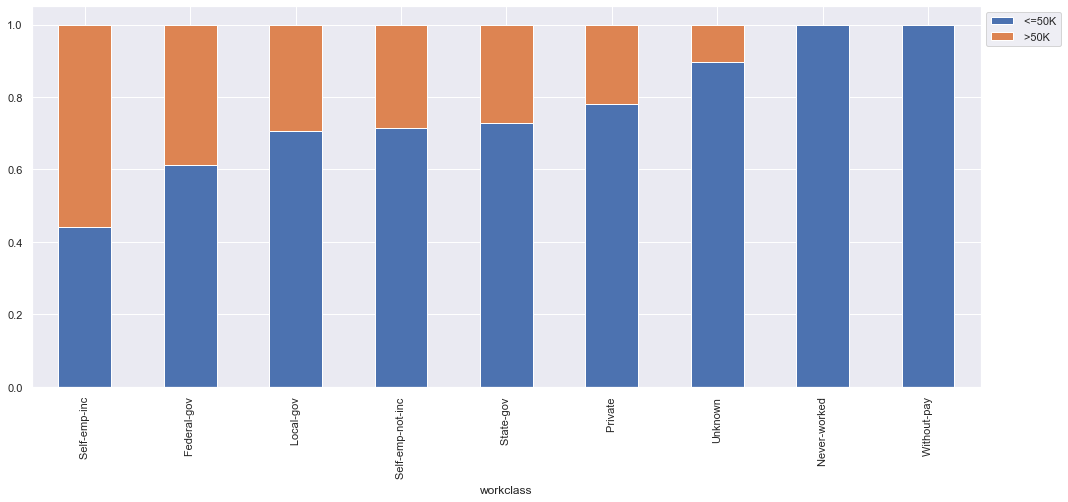

In [47]:
stacked_plot(data['workclass'])

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

### salary vs marital_status

salary           <=50K   >50K    All
marital_status                      
All              24720   7841  32561
married           8297   6702  14999
not_married       6231    648   6879
Never-married    10192    491  10683
------------------------------------------------------------------------------------------------------------------------


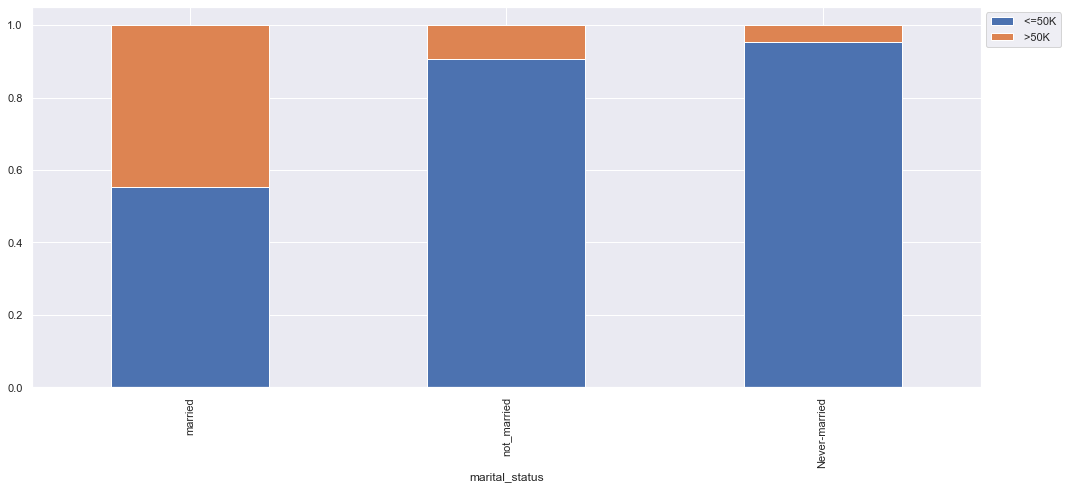

In [48]:
stacked_plot(data['marital_status'])

* Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people.

In [49]:
### Function to plot distributions and Boxplots of customers
import matplotlib.transforms as mtrans
def plot(x,target='salary'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} of people with <=50K salary',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == ' <=50K')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x} of people with >50K salary",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == ' >50K')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t salary',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t salary - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### salary vs age

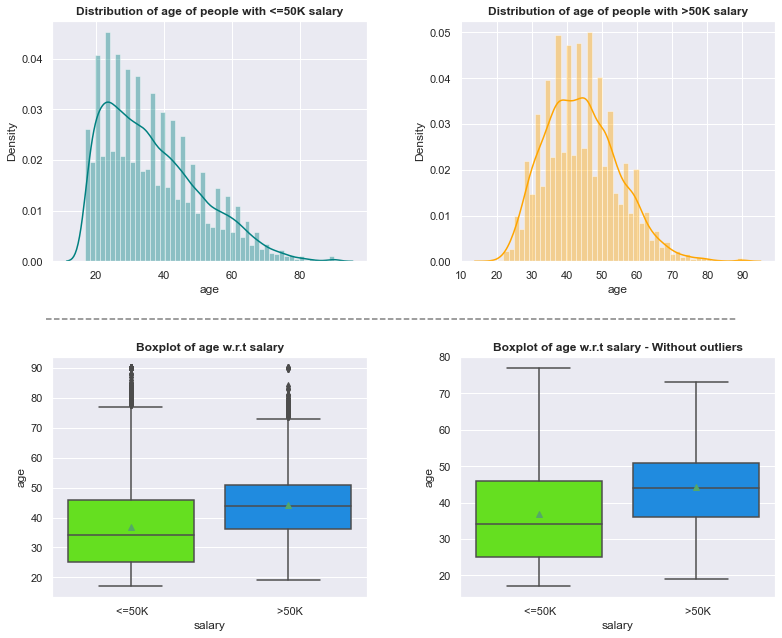

In [50]:
plot('age')

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

### salary vs working_hours_per_week

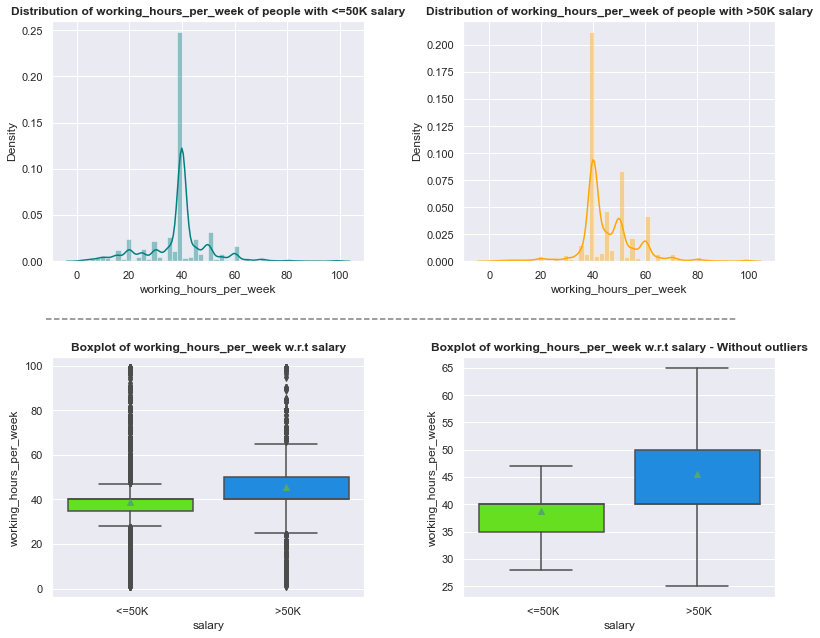

In [51]:
plot('working_hours_per_week')

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

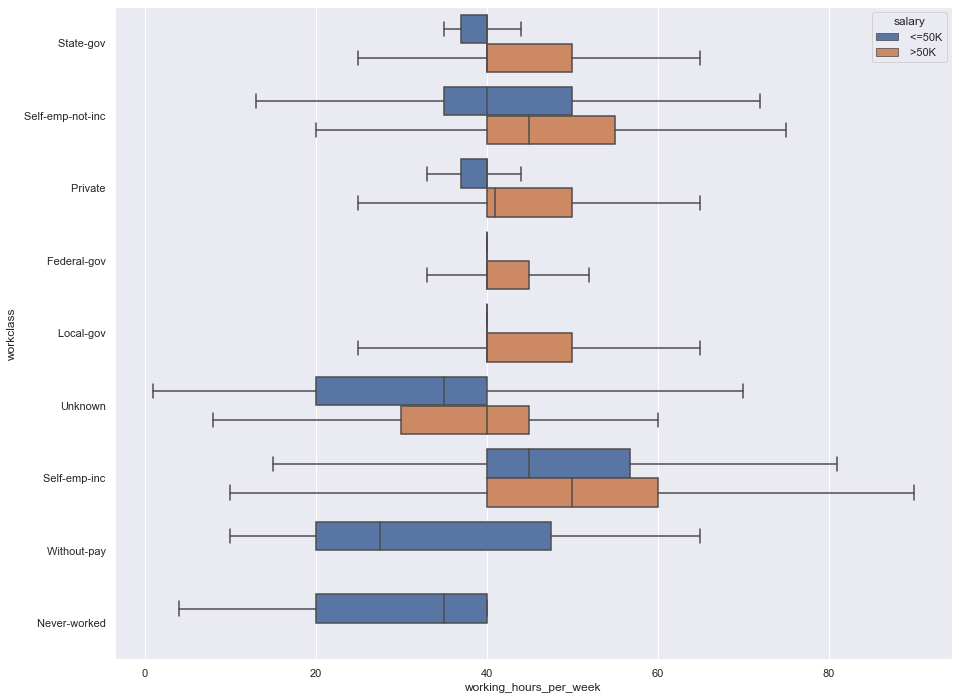

In [52]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="workclass", x="working_hours_per_week", data=data,hue='salary',showfliers=False);

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Dependent variable is the salary which is of categorical data type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type
* There are no missing values in the dataset.

**Data Cleaning:**

* We observed that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replaced these ?'s with the 'unknown' category.
* There are 42 distinct countries in the data set, which were reduced to their respective continents to reduce the dimension of data and we now have only 5 distinct values in the data.
* We reduced the distinct groups of marital_status to three categories: Married, Not-Married and Never-Married.

**Observations from EDA:**

* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `fnlwght`: fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.
* `working_hours_per_week`: Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week. Some of the observations are clear outliers like working  1 hour a week which needs to be treated.
* `workclass`: ~70% of the observations are from the Private sector working class.
* `marita_status`: 47.3% of the observations in the dataset are married followed by 32.8% of the people who never married.
* `race`: * 94% of the people are native to north_america followed by 2.1% Asians.
* `salary vs sex`: ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* `salary vs occupation`: - ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above 50,000 dollars. People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.
* `salary vs education`: ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above 50K dollars
* `salary vs workclass`: ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K. ~20% of the people working in the private sector earn more than 50K.
* `salary vs working_hours_per_week`: Majority of people having above 50K salary work around 40 hours per week.
* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.


**Actions for data pre-processing:**

* Many variables have outliers that need to be treated.
* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

### Data Pre-Processing

* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping capital_gain and capital_loss**

In [53]:
data.drop(['capital_gain','capital_loss'],axis=1,inplace=True)

**Outliers detection using boxplot**

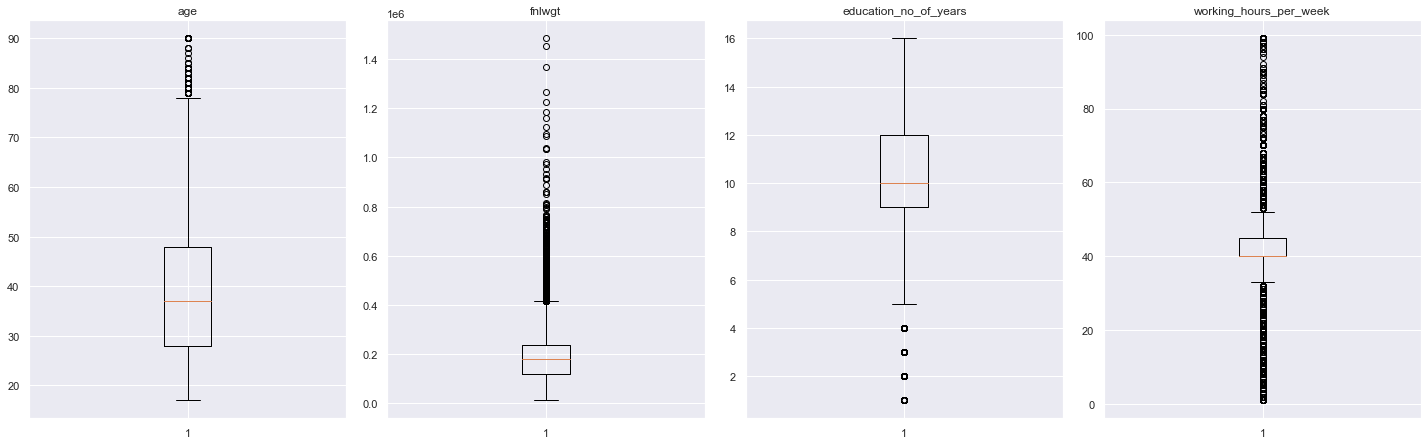

In [54]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers. 
* education_no_years has lower outliers. 
* working_hours_per_week has both upper and lower outliers.

### Treating Outliers

In [55]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

In [56]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

# treating outliers
numerical_col = [ele for ele in numerical_col] 
data = treat_outliers_all(data,numerical_col)

### Data Preparation

* Converting the data type of categorical features to 'category'

In [57]:
## converting object type columns to category
data[cat_columns] = data[cat_columns].astype('category')

data['salary'] = data['salary'].apply(lambda x: 1 if x==' <=50K' else 0) 

#### Creating a function to split, encode and add a constant to X
* The function will save us some time while checking high VIF values as we have to iteratively drop variables and check model performance.

In [58]:
def split(*kwargs):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = data.drop([*kwargs], axis=1)
    Y = data['salary']

    X = pd.get_dummies(X,drop_first=True)
    X = add_constant(X)

    #Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
    return X_train,X_test, y_train, y_test

In [59]:
X_train,X_test, y_train, y_test = split('salary')

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person has a salary >50K but actually the salary is <=50K.
2. Predicting a person doesn't have a salary >50K but actually, the salary is >50k.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person has a salary >50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme.

* If we predict a person doesn't have a salary >50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme.

### How to reduce losses?
* We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
*  Therefore, `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_metrics_score1 function will be used to check the model performance of models built using the statsmodels library.
* The get_metrics_score2 function will be used to check the model performance of models built using the Sklearn library.

In [60]:
def get_metrics_score1(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [61]:
def get_metrics_score2(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [62]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - >50K","Actual - <=50K"]],
                  columns = [i for i in ['Predicted - >50K','Predicted - <=50k']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression (with Sklearn library)

In [63]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score2(model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.8327922077922078
Accuracy on test set :  0.8382638959975433
Recall on training set :  0.9230052417006407
Recall on test set :  0.9178807947019868
Precision on training set :  0.8642635109341767
Precision on test set :  0.8783269961977186
F1 on training set :  0.8926690511730081
F1 on test set :  0.8976683937823834


- We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Logistic Regression (with statsmodels library)

In [64]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test)

         Current function value: 0.355823
         Iterations: 35
Accuracy on training set :  0.8334503334503335
Accuracy on test set :  0.8379568021291841
Recall on training set :  0.9223645894001165
Recall on test set :  0.9174834437086092
Precision on training set :  0.8654098360655738
Precision on test set :  0.8782807151007987
F1 on training set :  0.8929799830842966
F1 on test set :  0.8974541685560665


In [65]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 salary   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22741
Method:                           MLE   Df Model:                           50
Date:                Sun, 16 May 2021   Pseudo R-squ.:                  0.3631
Time:                        11:32:56   Log-Likelihood:                -8109.9
converged:                      False   LL-Null:                       -12733.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             9.8403   1.87e+06   5.28e-06      1.000   -3.66e+06    3.66e+06
age                              -0.0296      0.002    -16.233      0.000      -0.033      -0.026
fnlwgt                        -8.962e-07   2.11e-07     -4.244      0.000   -1.31e-06   -4.82e-07
education_no_of_years            -0.1993   3.11e+05  -6.41e-07      1.000   -6.09e+05    6.09e+05
working_hours_per_week           -0.0676      0.003    -19.417      0.000      -0.074      -0.061
workclass_ Local-gov              0.7003      0.127      5.529      0.000       0.452       0.949
workclass_ Never-worked          12.7506        nan        nan        nan         nan         nan
workclass_ Private                0.4649      0.105      4.424      0.000       0.259       0.671
workclass_ Self-emp-inc           0.1071      0.138      0.776      0.438      -0.163       0.377
workclass_ Self-emp-not-inc       0.9197      0.123      7.485      0.000       0.679       1.160
workclass_ State-gov              0.6757      0.140      4.843      0.000       0.402       0.949
workclass_ Without-pay           19.9913   1.04e+04      0.002      0.998   -2.04e+04    2.04e+04
workclass_Unknown                -5.7799        nan        nan        nan         nan         nan
education_ 11th                   0.1602   3.11e+05   5.15e-07      1.000   -6.09e+05    6.09e+05
education_ 12th                  -0.1161   6.22e+05  -1.87e-07      1.000   -1.22e+06    1.22e+06
education_ 1st-4th                0.4957   4.66e+05   1.06e-06      1.000   -9.14e+05    9.14e+05
education_ 5th-6th                0.1761   4.66e+05   3.78e-07      1.000   -9.14e+05    9.14e+05
education_ 7th-8th                0.2590   4.66e+05   5.55e-07      1.000   -9.14e+05    9.14e+05
education_ 9th                    0.2793   3.11e+05   8.99e-07      1.000   -6.09e+05    6.09e+05
education_ Assoc-acdm            -0.1817   1.87e+06  -9.74e-08      1.000   -3.66e+06    3.66e+06
education_ Assoc-voc             -0.4214   1.55e+06  -2.71e-07      1.000   -3.05e+06    3.05e+06
education_ Bachelors             -0.6339   2.18e+06  -2.91e-07      1.000   -4.26e+06    4.26e+06
education_ Doctorate             -0.9419   3.11e+06  -3.03e-07      1.000   -6.09e+06    6.09e+06
education_ HS-grad               -0.2731   9.33e+05  -2.93e-07      1.000   -1.83e+06    1.83e+06
education_ Masters               -0.8273   2.49e+06  -3.33e-07      1.000   -4.87e+06    4.87e+06
education_ Preschool             13.2214   4.66e+05   2.84e-05      1.000   -9.14e+05    9.14e+05
education_ Prof-school           -1.2857    2.8e+06   -4.6e-07      1.000   -5.48e+06    5.48e+06
education_ Some-college          -0.3997   1.24e+06  -3.21e-07      1.000   -2.44e+06    2.44e+06
marital_status_married           -2.5557      0.069    -37.298      0.000      -2.690      -2.421
marital_status_not_married       -0.4237      0.083     -5.104      0.000      -0.586      -0.261
occupat

**But first we will have to remove multicollinearity from the data to get reliable coefficients and p-values.** 
* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

### Multicollinearity

In [66]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train.astype(float).copy()

In [67]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                             0.000000
age                               1.543408
fnlwgt                            1.037670
education_no_of_years                  inf
working_hours_per_week            1.230480
workclass_ Local-gov              3.157727
workclass_ Never-worked                inf
workclass_ Private                7.932842
workclass_ Self-emp-inc           2.238230
workclass_ Self-emp-not-inc       3.614046
workclass_ State-gov              2.343798
workclass_ Without-pay            1.017431
workclass_Unknown                      inf
education_ 11th                        inf
education_ 12th                        inf
education_ 1st-4th                     inf
education_ 5th-6th                     inf
education_ 7th-8th                     inf
education_ 9th                         inf
education_ Assoc-acdm                  inf
education_ Assoc-voc                   inf
education_ Bachelors                   inf
education_ Doctorat

* As we saw in our earlier analysis that wherever workclass has ? or unknown values occupation is also ? or unknown.
* The high correlation between these variables has been highlighted in the VIF values as well.
* We will drop occupation_Unknown as we get the same information from workclass_Unknown.
* education_no_of_years, education, and some categorical levels of Occupation, Workclass, relationship, native_country, and race also exhibit high multicollinearity.

#### Removing occupation_Unknown

In [68]:
X_train_num1 = X_train_num.drop('occupation_Unknown',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train_num1.values,i) for i in range(X_train_num1.shape[1])],index=X_train_num1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                             0.000000
age                               1.543408
fnlwgt                            1.037670
education_no_of_years                  inf
working_hours_per_week            1.230480
workclass_ Local-gov              3.157727
workclass_ Never-worked           1.010896
workclass_ Private                7.932842
workclass_ Self-emp-inc           2.238230
workclass_ Self-emp-not-inc       3.614046
workclass_ State-gov              2.343798
workclass_ Without-pay            1.017431
workclass_Unknown                 3.105519
education_ 11th                        inf
education_ 12th                        inf
education_ 1st-4th                     inf
education_ 5th-6th                     inf
education_ 7th-8th                     inf
education_ 9th                         inf
education_ Assoc-acdm                  inf
education_ Assoc-voc                   inf
education_ Bachelors                   inf
education_ Doctorat

* Removal of occupation_Unknown has fixed multicollinearity in workclass column.
* education_no_of_years and education also capture similar information and hence it is understandable that they have high VIF values.
* Now dropping education_no_of_years, and education to see which variable has a significant impact on the model's performance.

#### Let's create a model with all the features except occupation_Unknown

In [69]:
X_train,X_test,y_train,y_test = split('salary')

In [70]:
X_train.drop(['occupation_Unknown'],axis=1,inplace=True)
X_test.drop(['occupation_Unknown'],axis=1,inplace=True)

In [71]:
logit1 = sm.Logit(y_train, X_train.astype(float))
lg1 = logit1.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg1,X_train,X_test,y_train,y_test)

         Current function value: 0.355823
         Iterations: 35
Accuracy on training set :  0.8334503334503335
Accuracy on test set :  0.8379568021291841
Recall on training set :  0.9223645894001165
Recall on test set :  0.9174834437086092
Precision on training set :  0.8654098360655738
Precision on test set :  0.8782807151007987
F1 on training set :  0.8929799830842966
F1 on test set :  0.8974541685560665


#### Dropping education_no_of_years

In [72]:
X_train_num2 = X_train_num1.drop('education_no_of_years',axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train_num2.values,i) for i in range(X_train_num2.shape[1])],index=X_train_num2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                            327.504107
age                                1.543408
fnlwgt                             1.037670
working_hours_per_week             1.230480
workclass_ Local-gov               3.157727
workclass_ Never-worked            1.010896
workclass_ Private                 7.932842
workclass_ Self-emp-inc            2.238230
workclass_ Self-emp-not-inc        3.614046
workclass_ State-gov               2.343798
workclass_ Without-pay             1.017431
workclass_Unknown                  3.105519
education_ 11th                    2.207699
education_ 12th                    1.423685
education_ 1st-4th                 1.178784
education_ 5th-6th                 1.346636
education_ 7th-8th                 1.662528
education_ 9th                     1.548277
education_ Assoc-acdm              2.134350
education_ Assoc-voc               2.456743
education_ Bachelors               6.123671
education_ Doctorate               1.5849

* Dropping education_no_of_years fixes the multicollinearity in education column.

In [73]:
X_train1,X_test1,y_train,y_test = split('salary','education_no_of_years')

In [74]:
X_train1.drop(['occupation_Unknown'],axis=1,inplace=True)
X_test1.drop(['occupation_Unknown'],axis=1,inplace=True)

In [75]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg2,X_train1,X_test1,y_train,y_test,flag=True)

         Current function value: 0.355823
         Iterations: 35
Accuracy on training set :  0.8334503334503335
Accuracy on test set :  0.8379568021291841
Recall on training set :  0.9223645894001165
Recall on test set :  0.9174834437086092
Precision on training set :  0.8654098360655738
Precision on test set :  0.8782807151007987
F1 on training set :  0.8929799830842966
F1 on test set :  0.8974541685560665


* No significant change in the model performance.

#### Dropping education

In [76]:
X_train2,X_test2,y_train,y_test = split('salary','education')

In [77]:
X_train2.drop(['occupation_Unknown'],axis=1,inplace=True)
X_test2.drop(['occupation_Unknown'],axis=1,inplace=True)

In [78]:
X_train_num3 = X_train2.astype(float).copy()
vif_series4 = pd.Series([variance_inflation_factor(X_train_num3.values,i) for i in range(X_train_num3.shape[1])],index=X_train_num3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

const                            314.852442
age                                1.489234
fnlwgt                             1.033255
education_no_of_years              1.533282
working_hours_per_week             1.223754
workclass_ Local-gov               3.147016
workclass_ Never-worked            1.009753
workclass_ Private                 7.925086
workclass_ Self-emp-inc            2.229977
workclass_ Self-emp-not-inc        3.602889
workclass_ State-gov               2.333573
workclass_ Without-pay             1.016985
workclass_Unknown                  3.090059
marital_status_married             1.977821
marital_status_not_married         1.719371
occupation_ Armed-Forces           1.011604
occupation_ Craft-repair           2.178469
occupation_ Exec-managerial        2.051804
occupation_ Farming-fishing        1.381175
occupation_ Handlers-cleaners      1.436503
occupation_ Machine-op-inspct      1.576180
occupation_ Other-service          1.7859

* VIF value for education_no_of_years has reduced.

In [79]:
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg3 = logit3.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg3,X_train2,X_test2,y_train,y_test)

         Current function value: 0.356502
         Iterations: 35
Accuracy on training set :  0.8327922077922078
Accuracy on test set :  0.8377520728836114
Recall on training set :  0.921549213744904
Recall on test set :  0.9166887417218543
Precision on training set :  0.8652594739432383
Precision on test set :  0.878633997714866
F1 on training set :  0.8925176974927377
F1 on test set :  0.8972580540610618


* No significant change in the model performance.

**Observations:**
1. Dropping education_no_of_years and education doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.
3. Here, we will go with the lg2 model - where we dropped education_no_of_years as the education column captures more specific information.
4. Some of the categorical levels of a variable still have VIF>5 but removing certain categories from a variable will impact the interpretations from the model.

#### Summary of final model

In [80]:
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 salary   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22741
Method:                           MLE   Df Model:                           50
Date:                Sun, 16 May 2021   Pseudo R-squ.:                  0.3631
Time:                        11:33:07   Log-Likelihood:                -8109.9
converged:                      False   LL-Null:                       -12733.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.6446      0.404     21.422      0.000       7.854       9.436
age                              -0.0296      0.002    -16.233      0.000      -0.033      -0.026
fnlwgt                        -8.962e-07   2.11e-07     -4.244      0.000   -1.31e-06   -4.82e-07
working_hours_per_week           -0.0676      0.003    -19.417      0.000      -0.074      -0.061
workclass_ Local-gov              0.7003      0.127      5.529      0.000       0.452       0.949
workclass_ Never-worked          15.2366   3027.024      0.005      0.996   -5917.621    5948.094
workclass_ Private                0.4649      0.105      4.424      0.000       0.259       0.671
workclass_ Self-emp-inc           0.1071      0.138      0.776      0.438      -0.163       0.377
workclass_ Self-emp-not-inc       0.9197      0.123      7.485      0.000       0.679       1.160
workclass_ State-gov              0.6757      0.140      4.843      0.000       0.402       0.949
workclass_ Without-pay           19.9396   1.01e+04      0.002      0.998   -1.98e+04    1.99e+04
workclass_Unknown                 1.1909      0.158      7.556      0.000       0.882       1.500
education_ 11th                  -0.0390      0.243     -0.161      0.872      -0.515       0.437
education_ 12th                  -0.5146      0.292     -1.762      0.078      -1.087       0.058
education_ 1st-4th                0.7946      0.556      1.428      0.153      -0.296       1.885
education_ 5th-6th                0.4751      0.353      1.345      0.179      -0.217       1.167
education_ 7th-8th                0.5579      0.268      2.085      0.037       0.034       1.082
education_ 9th                    0.4786      0.306      1.566      0.117      -0.120       1.078
education_ Assoc-acdm            -1.3774      0.201     -6.856      0.000      -1.771      -0.984
education_ Assoc-voc             -1.4178      0.192     -7.388      0.000      -1.794      -1.042
education_ Bachelors             -2.0289      0.179    -11.325      0.000      -2.380      -1.678
education_ Doctorate             -2.9347      0.240    -12.243      0.000      -3.405      -2.465
education_ HS-grad               -0.8710      0.175     -4.988      0.000      -1.213      -0.529
education_ Masters               -2.4216      0.191    -12.707      0.000      -2.795      -2.048
education_ Preschool             14.7471   1084.422      0.014      0.989   -2110.680    2140.174
education_ Prof-school           -3.0793      0.224    -13.758      0.000      -3.518      -2.641
education_ Some-college          -1.1969      0.177     -6.755      0.000      -1.544      -0.850
marital_status_married           -2.5557      0.069    -37.298      0.000      -2.690      -2.421
marital_status_not_married       -0.4237      0.083     -5.104      0.000      -0.586      -0.261
occupation_ Armed-Forces          0.9057      1.334      0.679      0.497      -1.708       3.520
occupat

* In the case of 'race' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value and not all the categorical levels. Hence, the variable can be considered significant overall.

In [81]:
X_train4 = X_train1.drop(['race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White'], axis = 1)
X_test4 = X_test1.drop(['race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White'], axis = 1)

logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit(warn_convergence =False)

print(lg4.summary())

         Current function value: 0.355988
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22745
Method:                           MLE   Df Model:                           46
Date:                Sun, 16 May 2021   Pseudo R-squ.:                  0.3628
Time:                        11:33:07   Log-Likelihood:                -8113.7
converged:                      False   LL-Null:                       -12733.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.2711      0.303     27.327      0.000       7.678       8.864
age     

* Now all the columns left are significant predictors, let's check the model performance and make interpretations.

#### Metrics of final model 'lg4'

In [82]:
scores_LR = get_metrics_score1(lg4,X_train4,X_test4,y_train,y_test)

Accuracy on training set :  0.8331432081432082
Accuracy on test set :  0.8377520728836114
Recall on training set :  0.9223063482818871
Recall on test set :  0.9169536423841059
Precision on training set :  0.865118819994537
Precision on test set :  0.878441822103794
F1 on training set :  0.892797744890768
F1 on test set :  0.897284686669691


#### ROC-AUC

* ROC-AUC on training set

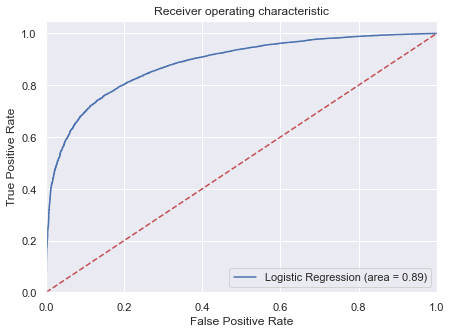

In [83]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train4))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

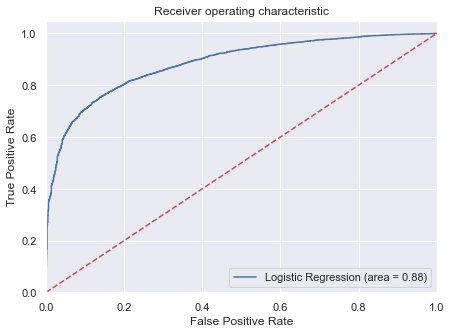

In [84]:
logit_roc_auc_test = roc_auc_score(y_test, lg4.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.

### Coefficient interpretations

* Coefficient of some levels of education, workclass, marital_status, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 
* Coefficient of age,fnlwgt,working_hours_per_week, sex_ Male, some levels of education, workclass, marital_status, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

* Odds from coefficients

In [85]:
odds = np.exp(lg4.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train4.columns, columns=['odds']).T # adding the odds to a dataframe

,const,age,fnlwgt,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_married,marital_status_not_married,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Male,native_country_europe,native_country_north_america,native_country_other,native_country_south_america
odds,3909.392772,0.970697,0.999999,0.93435,1.996722,2.638114e+06,1.566772,1.091172,2.467504,1.941669,4.293271e+07,3.251208,0.954976,0.604038,2.250656,1.610284,1.75197,1.613733,0.251098,0.240849,0.130392,0.052725,0.416889,0.087804,9.229939e+06,0.045636,0.301374,0.077445,0.656634,2.690882,0.904445,0.466929,2.62995,2.045309,1.357575,2.54034,9.465809,0.618399,0.603091,0.8181,0.558863,1.196512,0.945481,0.699514,0.805048,1.145338,6.60766


* Percentage change in odds

In [86]:
perc_change_odds = (np.exp(lg4.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train4.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,const,age,fnlwgt,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_married,marital_status_not_married,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Male,native_country_europe,native_country_north_america,native_country_other,native_country_south_america
change_odds%,390839.277231,-2.930344,-0.000088,-6.565016,99.672197,2.638113e+08,56.677174,9.11725,146.750438,94.166867,4.293271e+09,225.120789,-4.502425,-39.59623,125.065568,61.028427,75.197003,61.37333,-74.890249,-75.91506,-86.960825,-94.727494,-58.311073,-91.219584,9.229938e+08,-95.436437,-69.862558,-92.255501,-34.336574,169.088198,-9.555463,-53.307081,162.994999,104.530902,35.757468,154.034001,846.580921,-38.160061,-39.690927,-18.190045,-44.113716,19.651218,-5.451867,-30.048589,-19.495236,14.533811,560.766047


### Coefficient interpretations

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person having salary <=50k by 0.97 times or a 2.93% decrease in odds of having salary <=50K.
* `working_hours_per_week`: Holding all other features constant a 1 unit change in the working_hours_per_week will decrease the odds of a person having salary <=50k by 0.93 times or a decrease of 6.5% decrease in odds of having salary <=50K.
* The odds of a male having salary <=50K is 0.94 times less than a female or a 5.45% fewer odds than female.
* The odds of a person whose marital status is married having a salary <=50K is 0.077 less than the person who was never married or 92.2% fewer odds of having salary <=50K. Similarly, The odds of a person whose marital status is not_married having a salary <=50K is 0.65 times more than the person who was never married or 33.33% more odds of having a salary <=50K than the person who was never married. [keeping Never_married category as a reference].

`Interpretation for other attributes can be done similarly.`

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [87]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg4.predict(X_test4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.7754000284898506


In [88]:
scores_LR = get_metrics_score1(lg4,X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.7805809055809055
Accuracy on test set :  0.7784829562903061
Recall on training set :  0.7564356435643564
Recall on test set :  0.7540397350993377
Precision on training set :  0.94068226262041
Precision on test set :  0.9488333333333333
F1 on training set :  0.8385576395390129
F1 on test set :  0.8402952029520295
ROC-AUC Score on training set :  0.8053789743969061
ROC-AUC Score on test set :  0.8078445633585917


* Precision of model has increased but the other metrics have reduced.
* The model is still giving a generalized performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

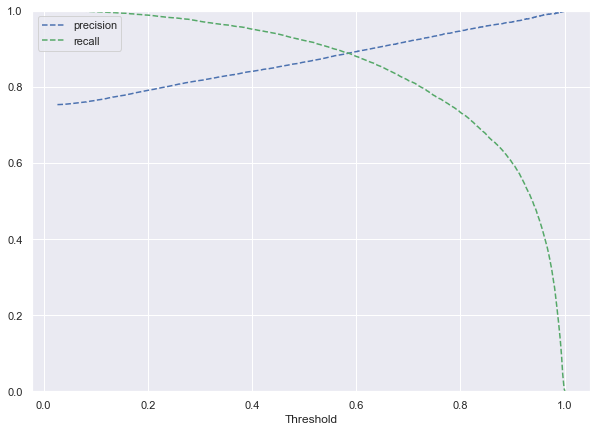

In [89]:
y_scores=lg4.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision.

In [90]:
optimal_threshold_curve = 0.58

scores_LR = get_metrics_score1(lg4,X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

Accuracy on training set :  0.832046332046332
Accuracy on test set :  0.8282321629644794
Recall on training set :  0.8902737332556785
Recall on test set :  0.8793377483443708
Precision on training set :  0.8871735345327917
Precision on test set :  0.8964353227113151
F1 on training set :  0.8887209302325582
F1 on test set :  0.8878042257288046
ROC-AUC Score on training set :  0.7722446574496108
ROC-AUC Score on test set :  0.7668432770563676


* There's not much change in the model performance as the default threshold is 0.5 and we selected 0.58 as the optimal threshold.

### Model Performance Summary

In [91]:
# defining list of model
models = [lg4]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train4,X_test4,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [92]:
# defining list of model
models = [lg4]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [93]:
# defining list of model
models = [lg4]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [94]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0 .77',
                                          'Logistic Regression - Optimal threshold = 0 .58'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic Regression Model - Statsmodels,0.833143,0.837752,0.922306,0.916954,0.865119,0.878442,0.892798,0.897285
1,Logistic Regression - Optimal threshold = 0 .77,0.780581,0.778483,0.756436,0.754040,0.940682,0.948833,0.838558,0.840295
2,Logistic Regression - Optimal threshold = 0 .58,0.832046,0.828232,0.890274,0.879338,0.887174,0.896435,0.888721,0.887804


### Conclusion
- We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89 on the training set and formulate policies accordingly. (Statsmodels -  Logistic Regression - with significant predictors).
- Coefficient of some levels of education, workclass, marital_status, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 
- Coefficient of age,fnlwgt,working_hours_per_week, sex_ Male, some levels of education, workclass, marital_status, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

### Recommendations

- The government should promote education among citizens, they should make policies to make education accessible to all, as we say in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars. 
- Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- People who invest more are more likely to have a salary above 50k, government should initiate investment schemes and facilitate ease of investment so that people can plan and invest in resources.
- As we saw in our analysis that Asian-Pac-Islander and White people are paid more than other races, there should be reforms to ensure that the salary criterion of employees is independent of their race.
- Reforms should be made for private-sector employees so that they are paid fairly for their work.
- Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.

#### Things to try:
* Perform more univariate and bivariate analysis to get a better understanding of distributions.